In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context('talk')

In [2]:
nc_shape = gpd.read_file("../data/nc_county_2020_shp")
maternal_mortality = pd.read_csv('../data/maternal_disorder_mortality.csv')

In [3]:
maternal_mortality = maternal_mortality.loc[:, ["GEOID20", "Mortality Rate, 2014*"]]

In [4]:
nc_shape.GEOID20 = nc_shape.GEOID20.astype('float64')

In [5]:
merged = nc_shape.merge(maternal_mortality, on="GEOID20")

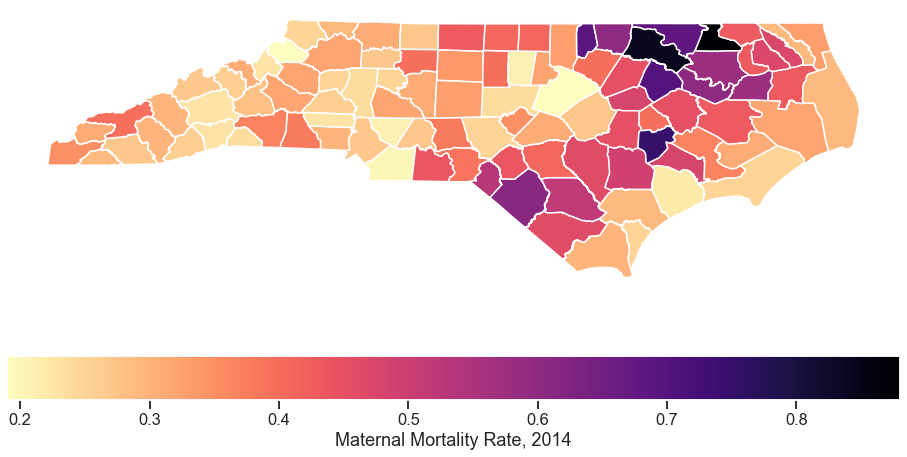

In [9]:
fig, ax = plt.subplots(1, figsize =(16, 8))
ax.axis('off')
merged.plot(column='Mortality Rate, 2014*', 
            ax = ax, 
            legend=True, 
            cmap='magma_r', 
            legend_kwds={'label': "Maternal Mortality Rate, 2014", 'orientation': "horizontal"}).get_figure().savefig('../plots/nc_mat_mort14.png')